# Hw 1
### Joshua Karten

This assignment explores the Lyapunov exponent through the calculation of the Mandelbrot set as done in class. Codes are adapted from class discussions, mostly for the plotting. If there is an issue with the plot not being interactive, the %matplotlib rendering mode will likely need to change as this was developed in VSCode on Windows.  
The plotting section is divided into two parts. The first displays the Lyapunov exponent as a heatmap, showing the result in the complex plane. The second part gives slices of the calculation, setting Im(z_o) constant.

In [28]:
from numpy import * # because arrays are defined in numpy
from numba import njit  # This is the new line with numba
from numba import prange

In [29]:
#Calculation of the lyapunov exponent of the Mandelbrot set
@njit
def MandL(z0, max_steps):
    lya=0 #initialize lyapunov exponent
    z=0j # initialize value of z for mapping
    for it in prange(max_steps):
        if abs(z)>2e1: #any large number will do. changing it will affect how the 
            return log(max_steps+1.0)/log(it+1.0) # catches things that go to infinity and characterizes how fast they go to infinity
            # The +1 accounts for starting at 0
        z=z*z+z0 # basic mapping for mandlebrot set sequence. define as f(z)
        lya += log(abs(2*z))
        # calculation of the lyapunov exponent via partial sums of log(f'(z))
    return lya/max_steps



In [30]:
# Same code as used in class for accumulating the data
@njit(parallel=True)
def Mandelbrot3(data, ext, max_steps):
    """
    ext[4]    -- array of 4 values [min_x,max_x,min_y,max_y]
    Nxy       -- int number of points in x and y direction
    max_steps -- how many steps we will try at most before we conclude the point is in the set
    """
    Nx,Ny = shape(data) 
    for i in range(Nx):
        for j in prange(Ny):    
                                
            x = ext[0] + (ext[1]-ext[0])*i/(Nx-1.)
            y = ext[2] + (ext[3]-ext[2])*j/(Ny-1.)
            data[i,j] = MandL(x + y*1j, max_steps)  


In [31]:

%matplotlib widget 
# This might need to change with your system. Widget works for vscode installations. 
# Other than the above addition, it is the same axis drawing procedure as demonstrated in calss
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from pylab import *    # plotting library
# don't use "%matplotlib inline"

def ax_update(ax):  # actual plotting routine
    ax.set_autoscale_on(False) # Otherwise, infinite loop
    # Get the range for the new area
    xstart, ystart, xdelta, ydelta = ax.viewLim.bounds
    xend = xstart + xdelta
    yend = ystart + ydelta
    ext=array([xstart,xend,ystart,yend])
    Mandelbrot3(data, ext, 2000) # actually producing new fractal
    
    # Update the image object with our new data and extent
    im = ax.images[-1]  # take the latest object
    im.set_data((data.T))   # update it with new data
    im.set_extent(ext)           # change the extent
    ax.figure.canvas.draw_idle() # finally redraw


data = zeros((1500,1000))
ext=[-2,1,-1,1]
Mandelbrot3(data, array(ext), 2000)


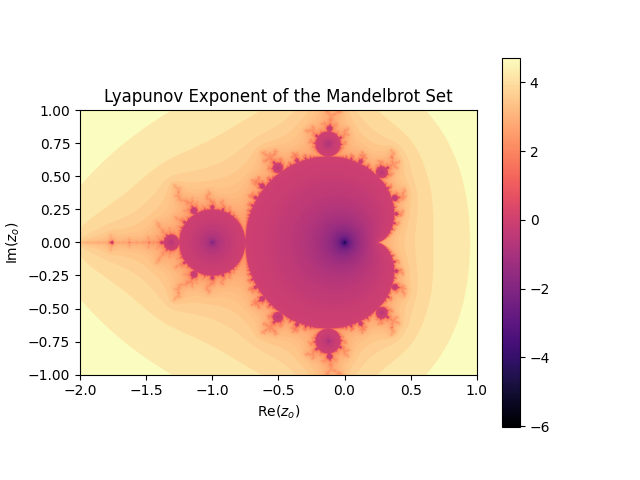

C:\Users\milkk\AppData\Local\Temp\ipykernel_36372\1592927533.py:20: RuntimeWarning: invalid value encountered in log
  im.set_data(-log(data.T))   # update it with new data
C:\Users\milkk\AppData\Local\Temp\ipykernel_36372\1592927533.py:20: RuntimeWarning: invalid value encountered in log
  im.set_data(-log(data.T))   # update it with new data


In [32]:
fig,ax = plt.subplots(1,1)
img= ax.imshow((data.T), extent=ext, aspect='equal',origin='lower',cmap=cm.magma)
fig.colorbar(img, ax=ax, location ='right', shrink = 1)   
ax.callbacks.connect('xlim_changed', ax_update)
ax.callbacks.connect('ylim_changed', ax_update)
ax.set_title('Lyapunov Exponent of the Mandelbrot Set')
ax.set_ylabel(r'$\text{Im}(z_o)$')
ax.set_xlabel(r'$\text{Re}(z_o)$')
plt.show()



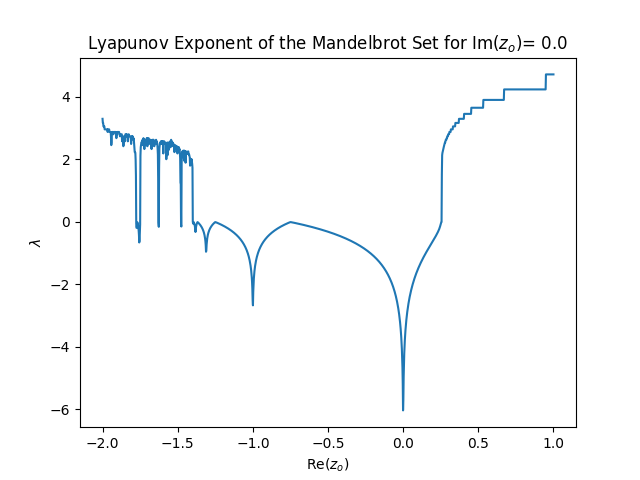

In [33]:
# This section shows slices of the lyaponov exponent for different Im(z_o)
fig, ax = plt.subplots()
Imz=500-1
ax.plot(linspace(-2,1,1500),data[:,Imz])
ax.set_title(r'Lyapunov Exponent of the Mandelbrot Set for Im($z_o$)= ' + str(-1 + (Imz+1)/500))
ax.set_ylabel(r'$\lambda$')
ax.set_xlabel(r'$\text{Re}(z_o)$')
plt.show()